<a href="https://colab.research.google.com/github/SophiaSansur/Prediction-of-Product-Sales/blob/main/Copy_of_prediction_of_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
- Author: Sophia Sansur
## Project Overview


## Load and Inspect Data

In [9]:
import pandas as pd
filepath="/content/drive/MyDrive/AXSOSACADEMY/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df_sales=pd.read_csv(filepath)

In [10]:
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [11]:
df_sales.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [12]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Clean Data

In [13]:
df_sales.shape

(8523, 12)

In [14]:
df_sales.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [15]:
 df_sales.duplicated().sum()

np.int64(0)

In [16]:
df_sales.isna()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
df_sales.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [18]:
df_sales['Outlet_Size']=df_sales['Outlet_Size'].fillna('missing')
df_sales['Outlet_Size'].value_counts(dropna=False)

,count
Outlet_Size,
Medium,2793
missing,2410
Small,2388
High,932


In [19]:
df_sales['Outlet_Size'].isna().sum()

np.int64(0)

In [20]:
df_sales['Item_Weight']=df_sales['Item_Weight'].fillna(-1)

In [21]:
df_sales['Item_Weight'].isna().sum()

np.int64(0)

In [22]:
string_cols=df_sales.select_dtypes('object').columns
string_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [23]:
for col in string_cols:
  print(f'value_counts for {col}')
  print(df_sales[col].value_counts())
  print('\n')

value_counts for Item_Identifier
Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64


value_counts for Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


value_counts for Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


value_counts for Outlet_Identifier
Outlet_Identifier
OUT027    935
OUT013

In [24]:
df_sales['Item_Fat_Content']=df_sales['Item_Fat_Content'].replace({'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'})
df_sales['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [25]:
import numpy as np


In [26]:
num_cols= df_sales.select_dtypes('number')
num_cols

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [27]:
stats= num_cols.agg(['min','max','mean'])
print(stats)

      Item_Weight  Item_Visibility    Item_MRP  Outlet_Establishment_Year  \
min     -1.000000         0.000000   31.290000                1985.000000   
max     21.350000         0.328391  266.888400                2009.000000   
mean    10.478936         0.066132  140.992782                1997.831867   

      Item_Outlet_Sales  
min           33.290000  
max        13086.964800  
mean        2181.288914  


## Exploratory Data Analysis



In [28]:
import matplotlib.pyplot as plt
import seaborn as sns


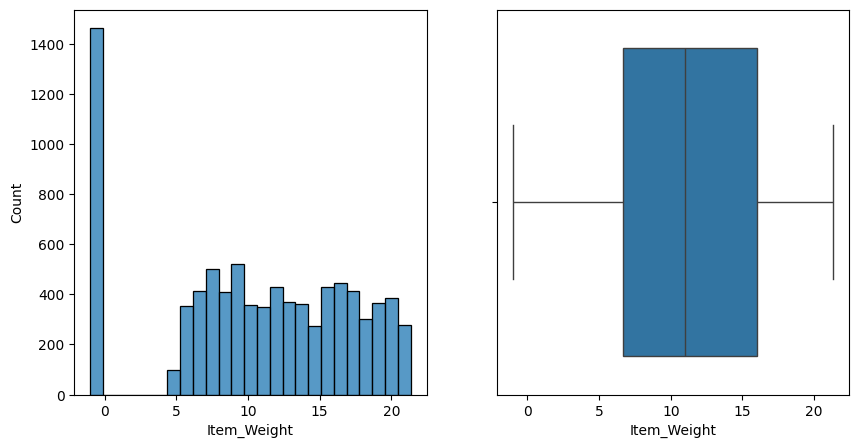

In [52]:
fig,axes=plt.subplots(ncols=2, figsize=(10,5))
sns.histplot(data=df_sales, x='Item_Weight',ax=axes[0]);
sns.boxplot(data=df_sales,x='Item_Weight', ax=axes[1]);

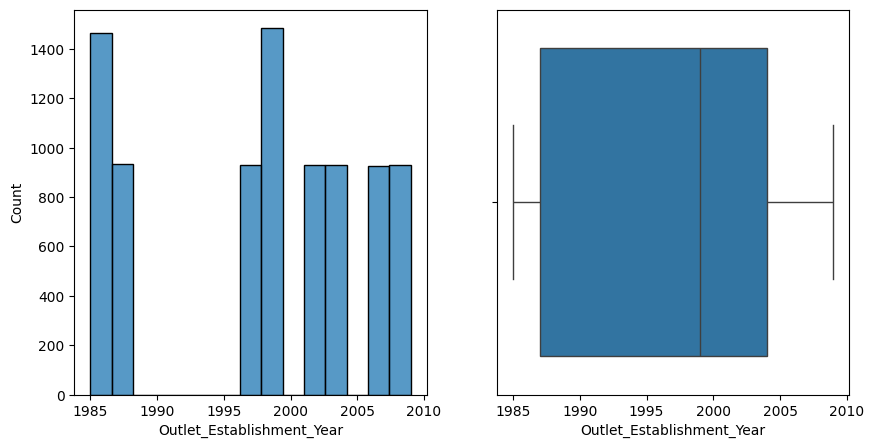

In [54]:
fig,axes=plt.subplots(ncols=2, figsize=(10,5))
sns.histplot(data=df_sales, x='Outlet_Establishment_Year',ax=axes[0]);
sns.boxplot(data=df_sales ,x='Outlet_Establishment_Year', ax=axes[1]);

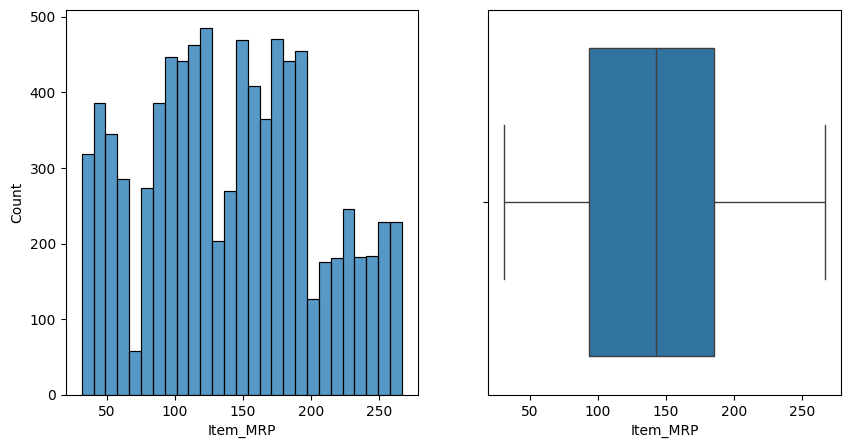

In [55]:
fig,axes=plt.subplots(ncols=2, figsize=(10,5))
sns.histplot(data=df_sales, x='Item_MRP',ax=axes[0]);
sns.boxplot(data=df_sales ,x='Item_MRP', ax=axes[1]);

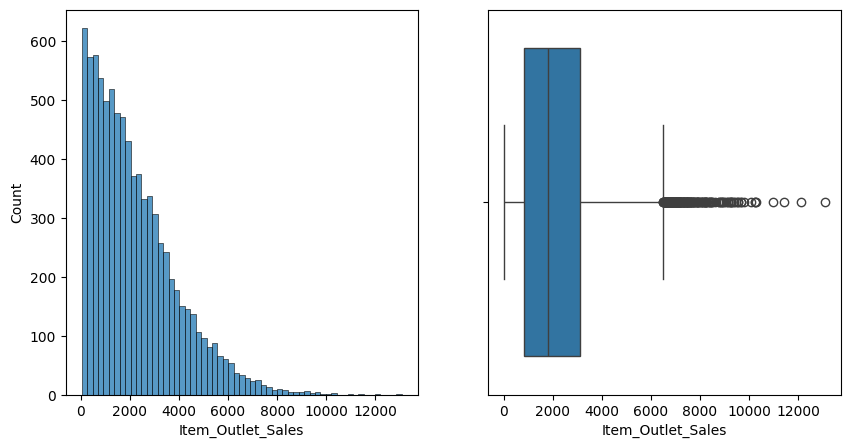

In [56]:
fig,axes=plt.subplots(ncols=2, figsize=(10,5))
sns.histplot(data=df_sales, x='Item_Outlet_Sales',ax=axes[0]);
sns.boxplot(data=df_sales ,x='Item_Outlet_Sales', ax=axes[1]);

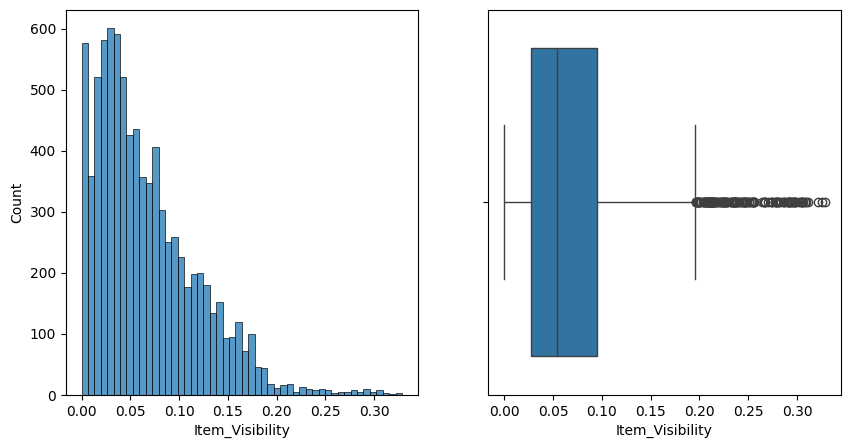

In [57]:
fig,axes=plt.subplots(ncols=2, figsize=(10,5))
sns.histplot(data=df_sales, x='Item_Visibility',ax=axes[0]);
sns.boxplot(data=df_sales ,x='Item_Visibility', ax=axes[1]);

<Axes: >

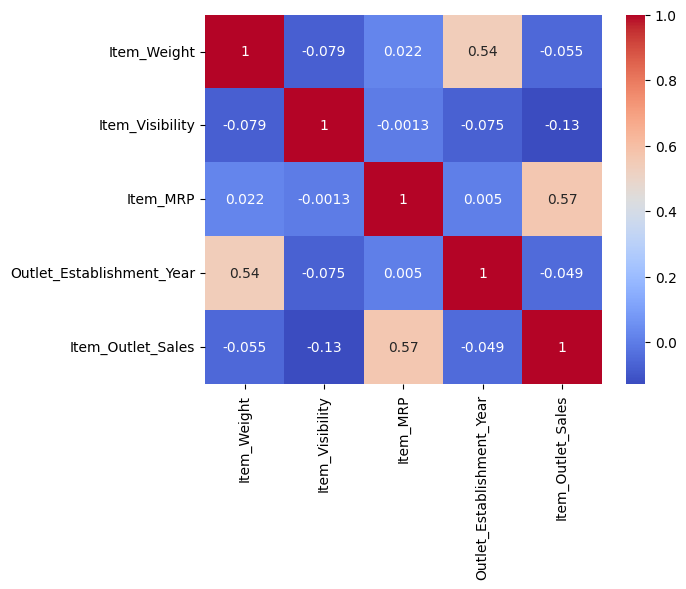

In [62]:
corr=df_sales.corr(numeric_only=True)
corr.round(2)
fig,ax=plt.subplots()
sns.heatmap(corr,cmap='coolwarm', annot=True)

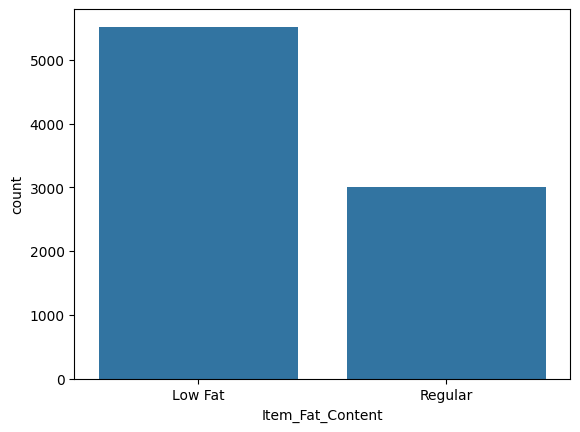

In [68]:
ax=sns.countplot(data=df_sales, x='Item_Fat_Content')

/tmp/ipython-input-3999312227.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


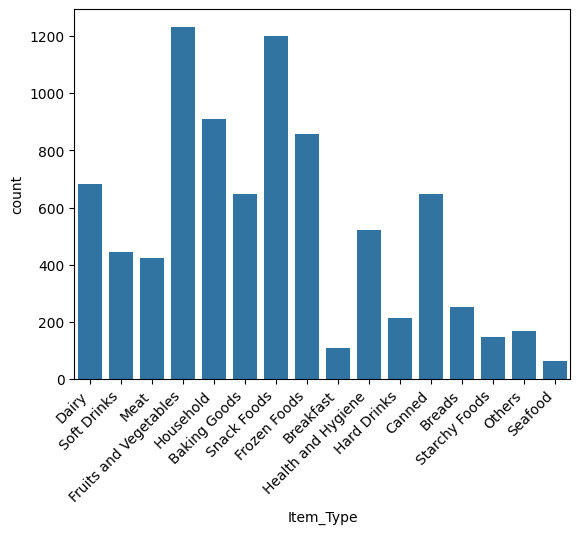

In [71]:
ax=sns.countplot(data=df_sales, x='Item_Type');
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

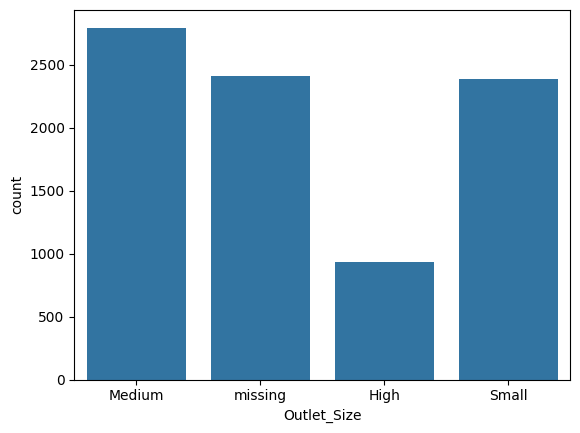

In [72]:
ax=sns.countplot(data=df_sales, x='Outlet_Size');

/tmp/ipython-input-682501346.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


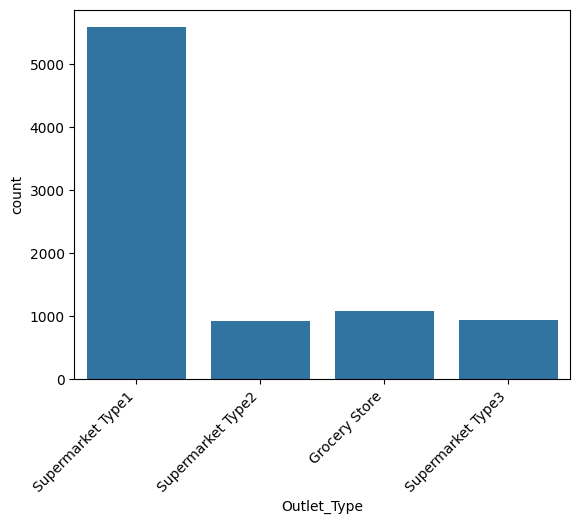

In [74]:
ax=sns.countplot(data=df_sales, x='Outlet_Type');
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

/tmp/ipython-input-191226994.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


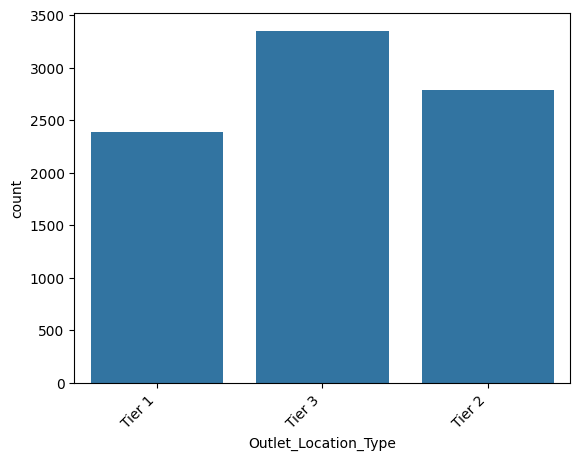

In [75]:
ax=sns.countplot(data=df_sales, x='Outlet_Location_Type');
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

## Feature Inspection
